X shape: (600, 800)


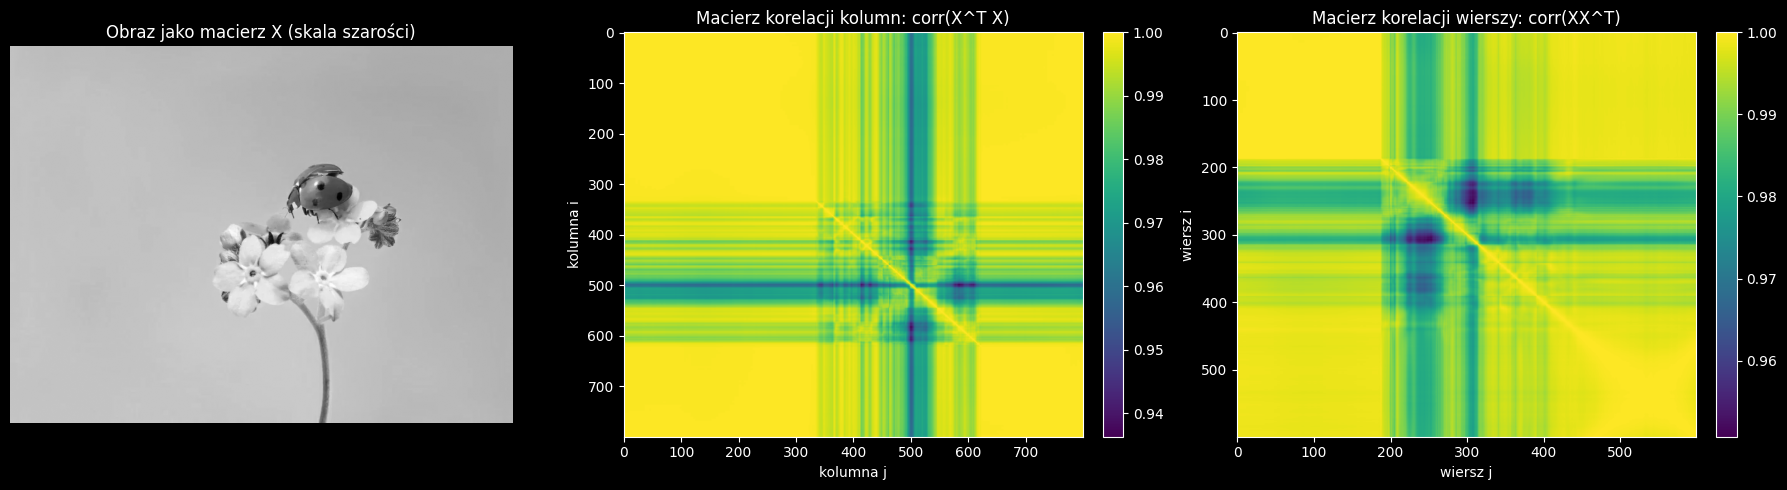

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("./data/lab1_10.webp" ).convert("RGB")
arr = np.asarray(img).astype(np.float64)

X = (0.2126*arr[:,:,0] + 0.7152*arr[:,:,1] + 0.0722*arr[:,:,2]) / 255.0
n, m = X.shape
print("X shape:", X.shape)

U, s, VT = np.linalg.svd(X, full_matrices=False)
s2 = s**2

V = VT.T
C_kol = (V * s2) @ V.T
C_wiersz = (U * s2) @ U.T

def normalize_corr(C):
    d = np.sqrt(np.clip(np.diag(C), 1e-12, None))
    return C / (d[:,None] * d[None,:])

C_kol_norm = normalize_corr(C_kol)
C_wiersz_norm = normalize_corr(C_wiersz)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].imshow(X, cmap="gray")
ax[0].set_title("Obraz jako macierz X (skala szarości)")
ax[0].axis("off")

im1 = ax[1].imshow(C_kol_norm, aspect="auto")
ax[1].set_title("Macierz korelacji kolumn: corr(X^T X)")
ax[1].set_xlabel("kolumna j")
ax[1].set_ylabel("kolumna i")
plt.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)

im2 = ax[2].imshow(C_wiersz_norm, aspect="auto")
ax[2].set_title("Macierz korelacji wierszy: corr(XX^T)")
ax[2].set_xlabel("wiersz j")
ax[2].set_ylabel("wiersz i")
plt.colorbar(im2, ax=ax[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()
